
# For Text Mining assignment
TWO:

2) Extract reviews of any product from ecommerce website like amazon Perform emotion mining

In [143]:
import nltk
import requests
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 5600x1400 with 0 Axes>

In [144]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [145]:
import requests

In [146]:
from bs4 import BeautifulSoup as bs

In [147]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup

In [148]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [149]:
from tqdm import tqdm_notebook
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [150]:
rg = pd.DataFrame(reviewlist)

rg

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBought it on 2nd June 2021...,5.0,"I had bought this product in 2021, I got it fo...",Reviewed in India on 2 February 2024
1,4.0 out of 5 stars\nFirst impression was bad b...,4.0,The first time I bought this product was in 20...,Reviewed in India on 27 July 2023
2,5.0 out of 5 stars\nGood product,5.0,As this is huge it its easy to fit overhead to...,Reviewed in India on 10 September 2023
3,3.0 out of 5 stars\naverage headphone for the ...,3.0,The build of this headphone is good. But the v...,Reviewed in India on 27 January 2024
4,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,Reviewed in India on 22 July 2023
...,...,...,...,...
105,4.0 out of 5 stars\nAt this price it's not bad,4.0,Love it it's my first time using mic on headse...,Reviewed in India on 10 February 2023
106,4.0 out of 5 stars\nBang for your buck(if unde...,4.0,For gaming-9/10 (Sound and footsteps everythin...,Reviewed in India on 22 June 2022
107,5.0 out of 5 stars\nThe Redgear Cloak is extre...,5.0,"I'm very Happy with this product, delivers all...",Reviewed in India on 8 September 2023
108,5.0 out of 5 stars\nWhat a headphone 🎧,5.0,Best Gaming Headphone 🎧 . I have purchased und...,Reviewed in India on 4 December 2023


In [151]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBought it on 2nd June 2021...,5.0,"I had bought this product in 2021, I got it fo...",2024-02-02
1,4.0 out of 5 stars\nFirst impression was bad b...,4.0,The first time I bought this product was in 20...,2023-07-27
2,5.0 out of 5 stars\nGood product,5.0,As this is huge it its easy to fit overhead to...,2023-09-10
3,3.0 out of 5 stars\naverage headphone for the ...,3.0,The build of this headphone is good. But the v...,2024-01-27
4,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,2023-07-22
...,...,...,...,...
105,4.0 out of 5 stars\nAt this price it's not bad,4.0,Love it it's my first time using mic on headse...,2023-02-10
106,4.0 out of 5 stars\nBang for your buck(if unde...,4.0,For gaming-9/10 (Sound and footsteps everythin...,2022-06-22
107,5.0 out of 5 stars\nThe Redgear Cloak is extre...,5.0,"I'm very Happy with this product, delivers all...",2023-09-08
108,5.0 out of 5 stars\nWhat a headphone 🎧,5.0,Best Gaming Headphone 🎧 . I have purchased und...,2023-12-04


In [152]:
ts = rg[['Rating','Review_Date']]
ts.set_index('Review_Date', inplace=True)

ts.head()

,Rating
Review_Date,
2024-02-02,5.0
2023-07-27,4.0
2023-09-10,5.0
2024-01-27,3.0
2023-07-22,4.0


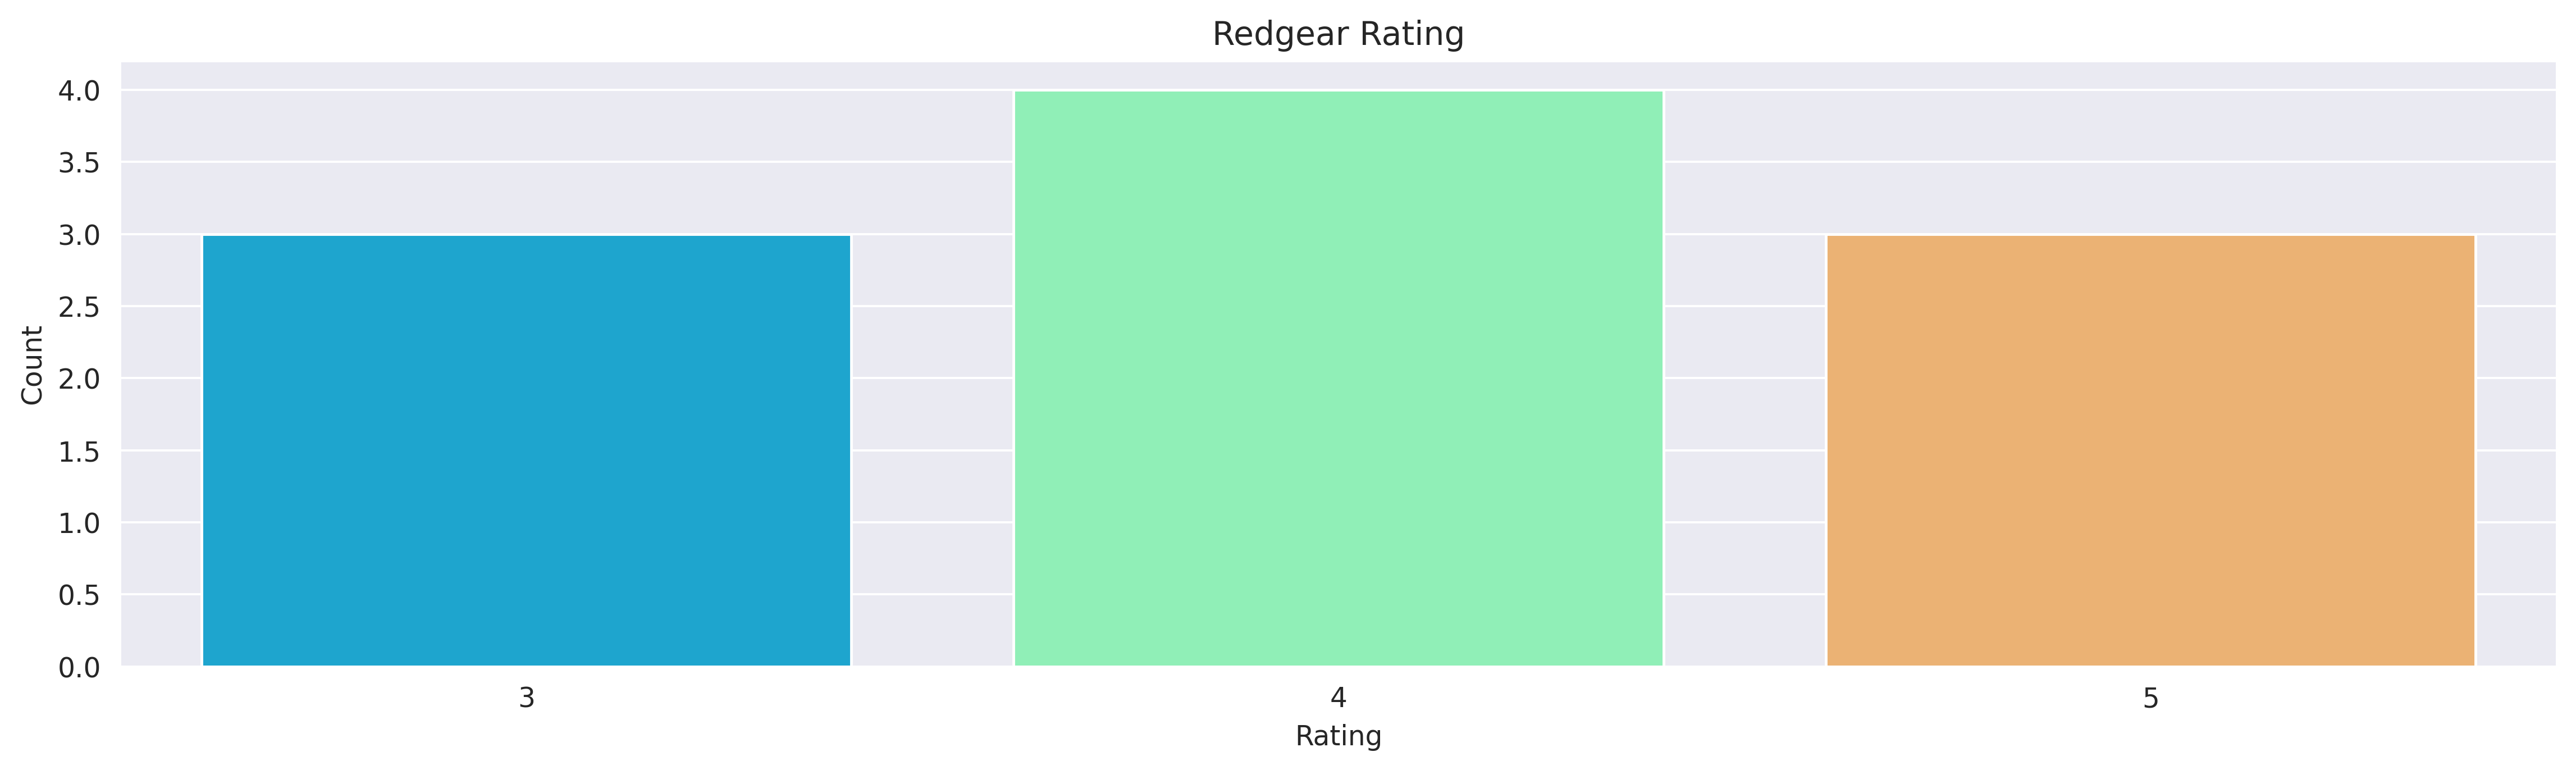

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
ts = pd.DataFrame({"Rating": [4, 5, 3, 4, 5, 4, 3, 5, 4, 3], "Review_Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05", "2023-01-06", "2023-01-07", "2023-01-08", "2023-01-09", "2023-01-10"]})

# Create the bar plot
plt.title('Redgear Rating')
sns.barplot(x = ts['Rating'].value_counts().index, y = ts['Rating'].value_counts().values, palette = 'rainbow')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Rating'>

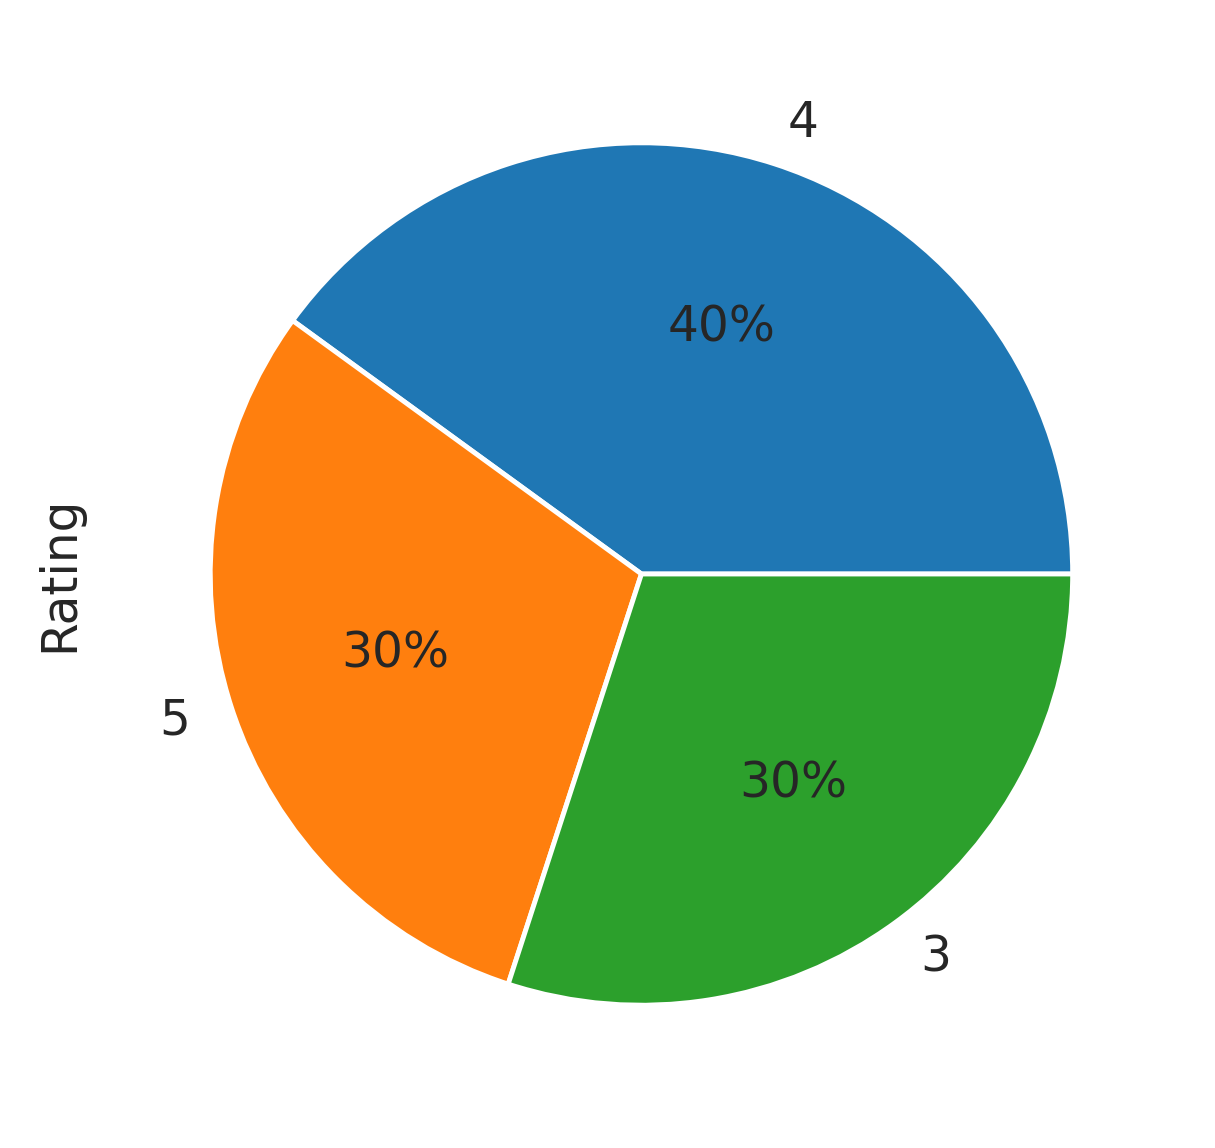

In [154]:
ts['Rating'].value_counts().plot(kind='pie',autopct='%1.00f%%')

<Axes: >

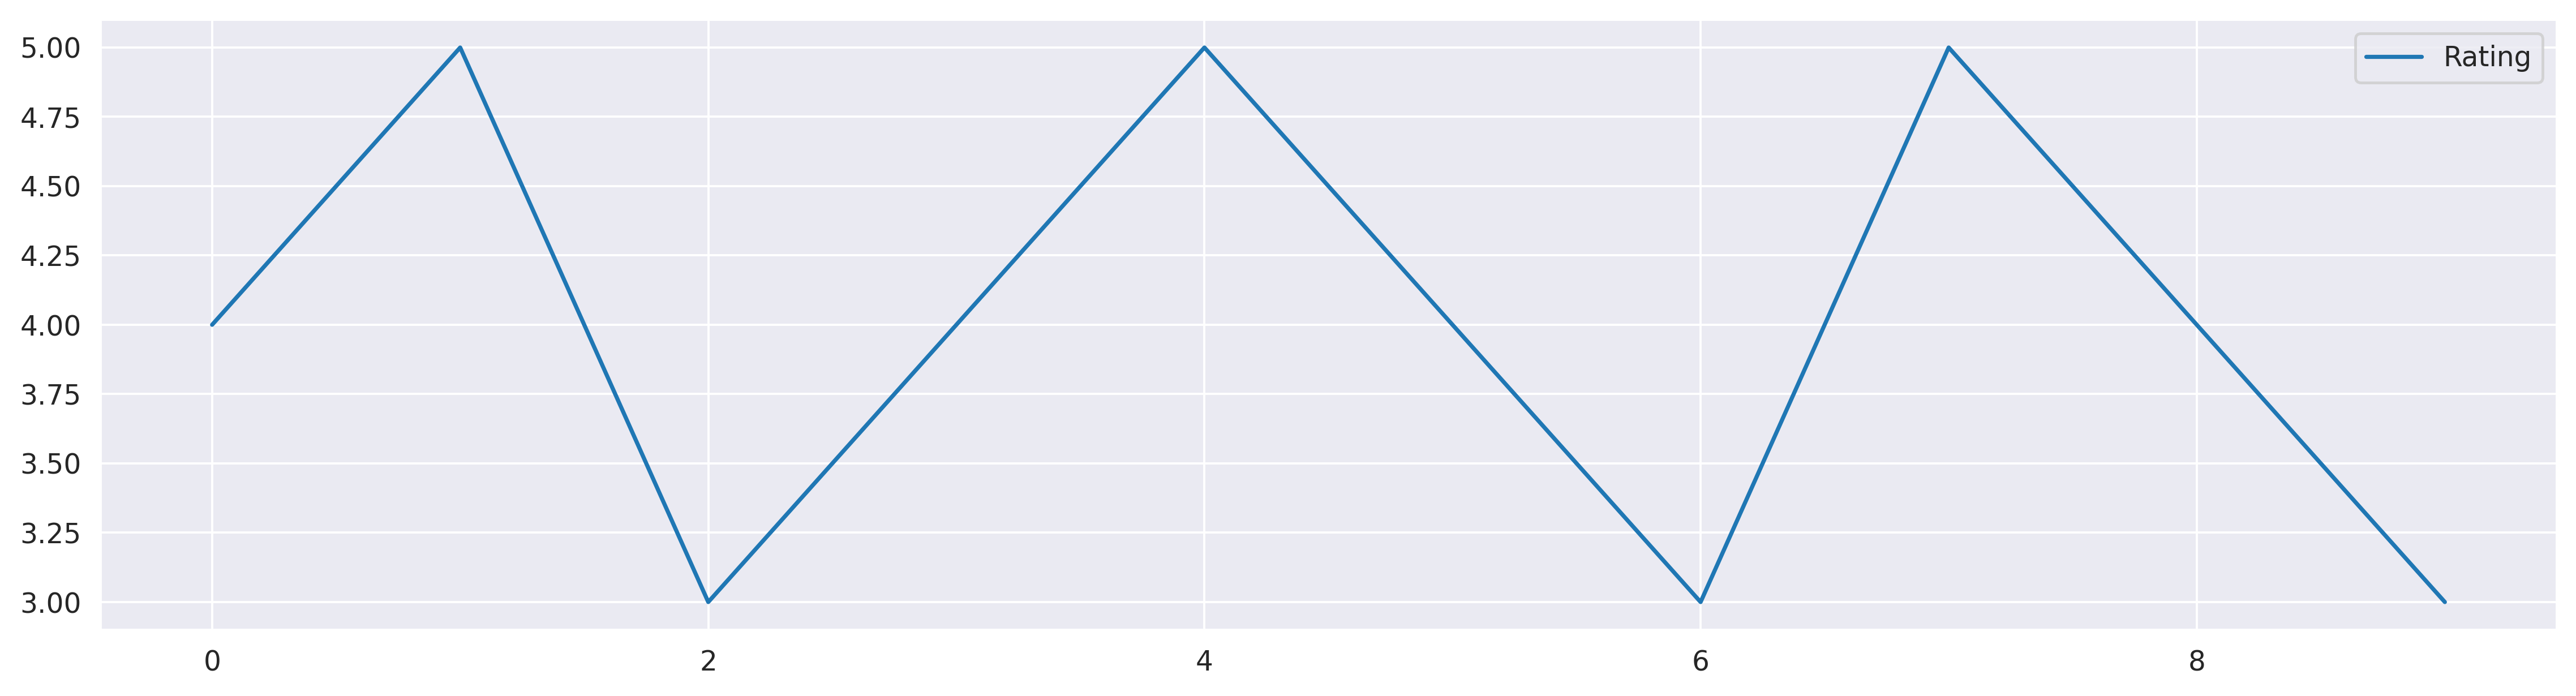

In [155]:
sns.lineplot(data= ts)

In [156]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [157]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
def corpu(em, Text):
    corpus = []
    for msg in em[Text]:
        msg = msg.lower()
        msg = msg.split()
        msg = [WordNetLemmatizer().lemmatize(i) for i in msg if i not in stopwords.words('english')]
        msg = ' '.join(msg)
        corpus.append(msg)
    return corpus

In [159]:
corpus = corpu(rg, 'Review')

In [160]:
corpus

['bought product 2021, got rs899. using nearly 12-14 hour day everyday past 2 half year also using several headphones, think no-one else would better rating product me.pros -1. good built decent comfort.2. best bass price segment (tested (brutal bass test top bass production yt & ultimate headphone test) multiple time throughout year new).3. sensitivity, frequency response, distortion phase point (it even defeated numerous headphone friend price range(1-1.5k) ).4. cable long help route.5. microphone sensitivity good loud.cons:-1. cable braided tangle easily.2. volume adjustment scroller side work occasion (might product).3. bit heavy feel uncomfortable longer sessions, especially perspire/sweat frequently (is good smaller session like 1-2 hours).overall rating = 4.7/5conclusion - budget around rs1000/- probably best would get.do buy expect extreme top level performance (such headphone rs.3-4k range) this.',
 'first time bought product 2021. opened package volume control bit messed know

In [161]:
def word_tok(corpus):
    word = []

    for i in corpus:
        words = word_tokenize(i)
        word.append(words)

    return word

In [162]:
word = word_tok(corpus)

word

[['bought',
  'product',
  '2021',
  ',',
  'got',
  'rs899',
  '.',
  'using',
  'nearly',
  '12-14',
  'hour',
  'day',
  'everyday',
  'past',
  '2',
  'half',
  'year',
  'also',
  'using',
  'several',
  'headphones',
  ',',
  'think',
  'no-one',
  'else',
  'would',
  'better',
  'rating',
  'product',
  'me.pros',
  '-1.',
  'good',
  'built',
  'decent',
  'comfort.2',
  '.',
  'best',
  'bass',
  'price',
  'segment',
  '(',
  'tested',
  '(',
  'brutal',
  'bass',
  'test',
  'top',
  'bass',
  'production',
  'yt',
  '&',
  'ultimate',
  'headphone',
  'test',
  ')',
  'multiple',
  'time',
  'throughout',
  'year',
  'new',
  ')',
  '.3.',
  'sensitivity',
  ',',
  'frequency',
  'response',
  ',',
  'distortion',
  'phase',
  'point',
  '(',
  'it',
  'even',
  'defeated',
  'numerous',
  'headphone',
  'friend',
  'price',
  'range',
  '(',
  '1-1.5k',
  ')',
  ')',
  '.4.',
  'cable',
  'long',
  'help',
  'route.5',
  '.',
  'microphone',
  'sensitivity',
  'good',
  '

In [163]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS

    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

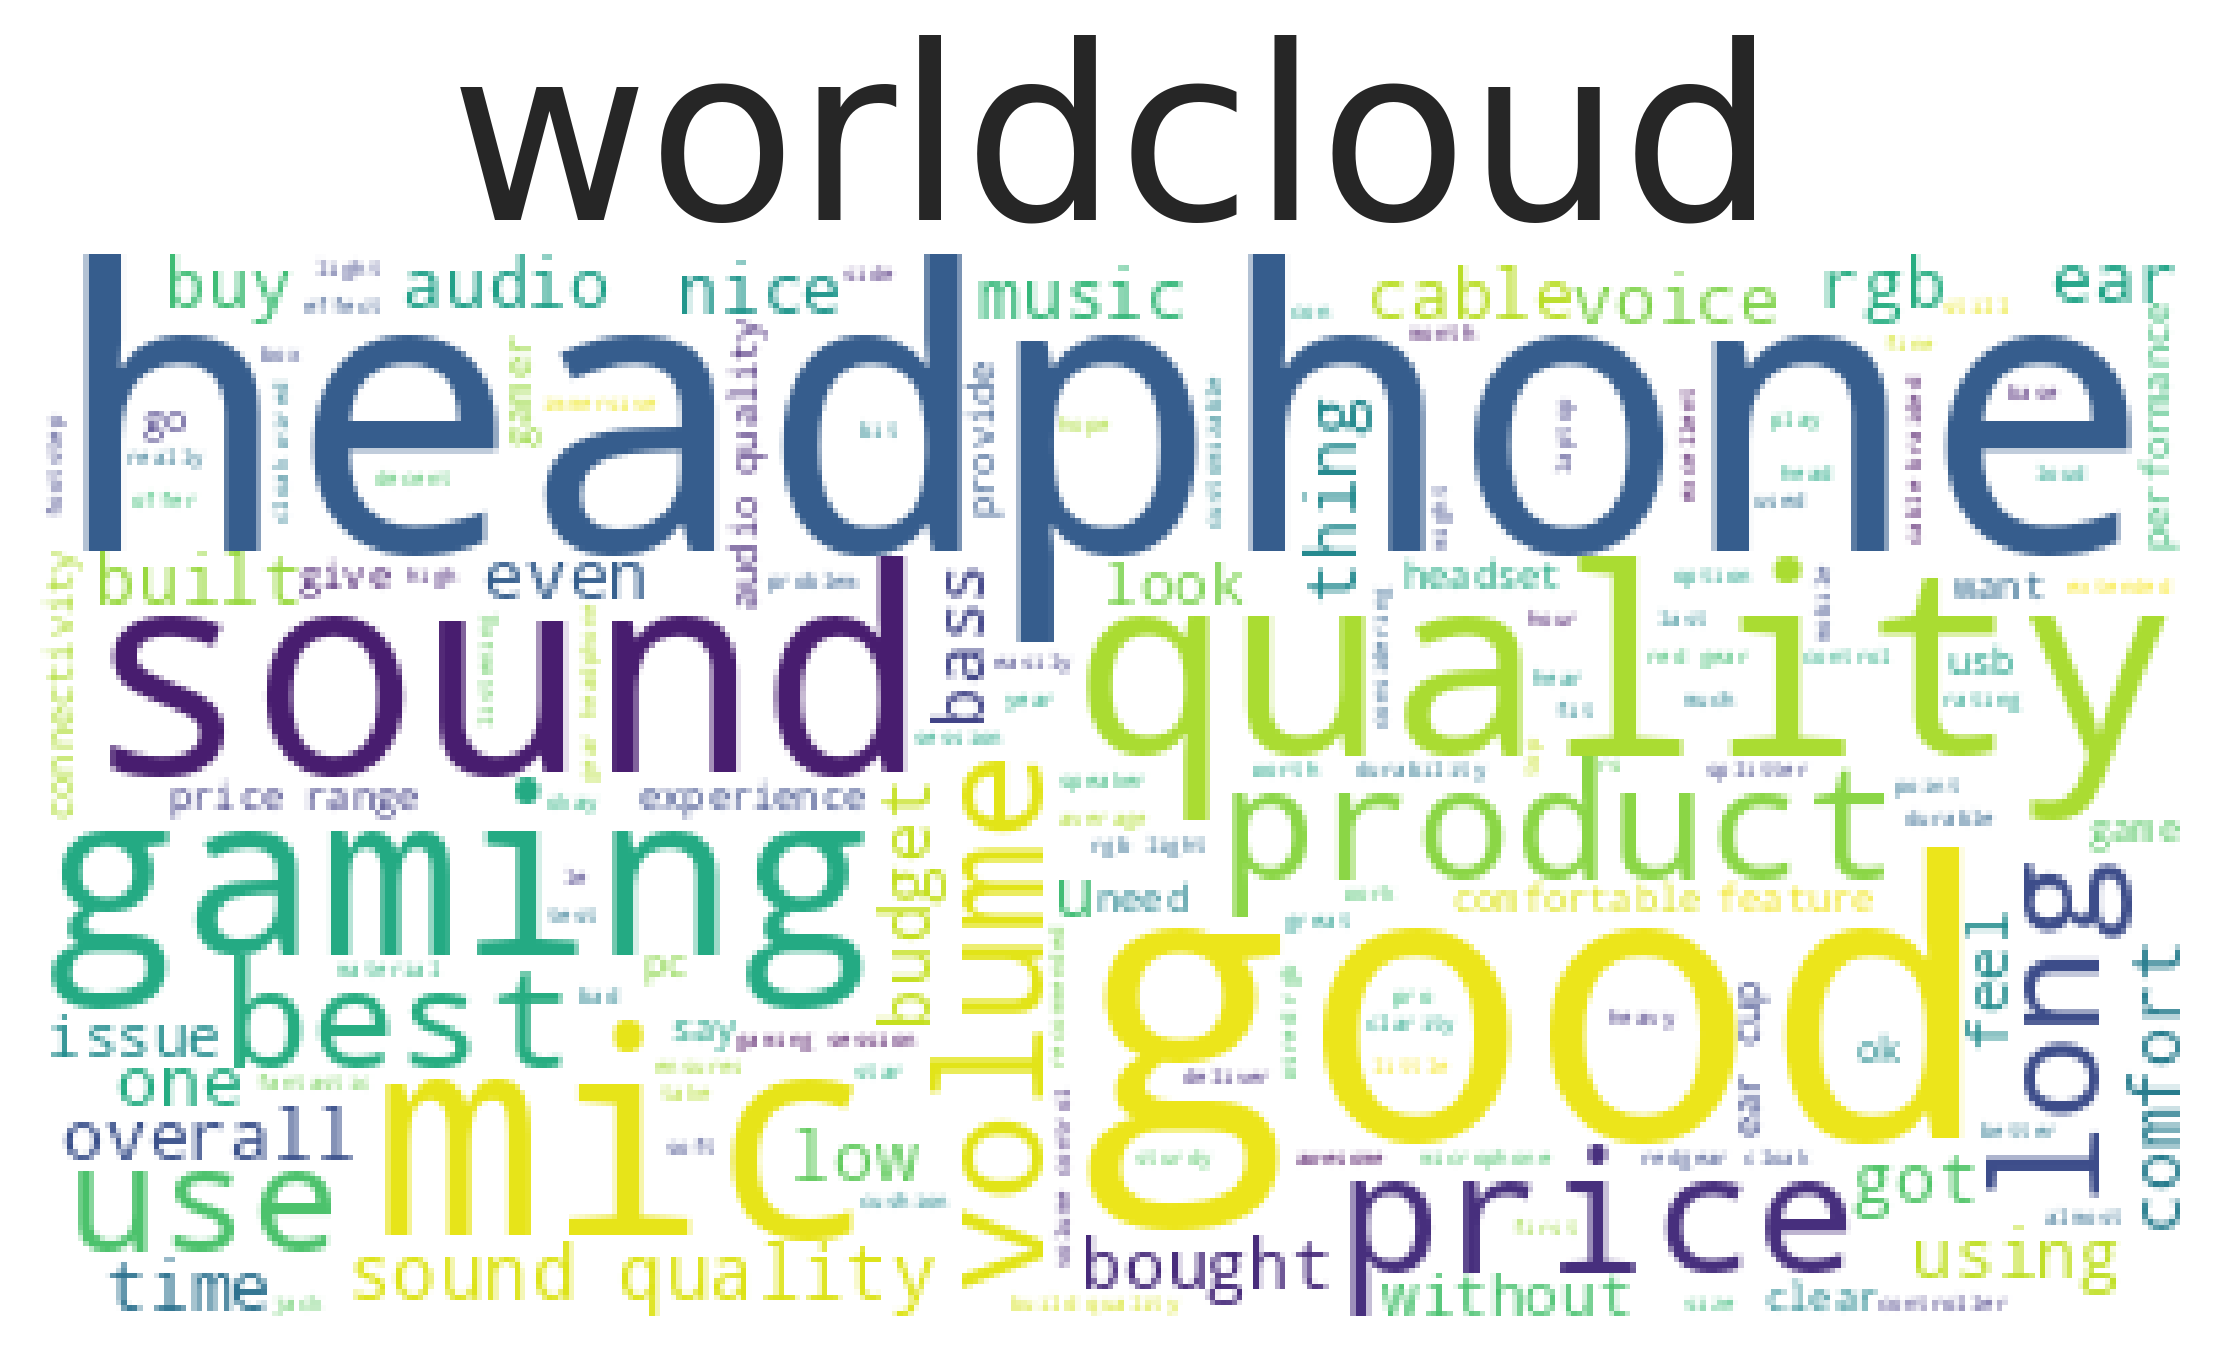

In [164]:
worldcloud(corpus)

In [165]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [166]:
cv.get_feature_names_out()

array(['000', '10', '1000', ..., 'youre', 'youtuber', 'yt'], dtype=object)

In [167]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow

,000,10,1000,12,14,15,150,16,19,1day,...,writing,yea,yeah,year,yes,yet,you,youre,youtuber,yt
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09757466],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [169]:
tf.get_feature_names_out()

array(['000', '10', '1000', ..., 'youre', 'youtuber', 'yt'], dtype=object)

In [170]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

,000,10,1000,12,14,15,150,16,19,1day,...,writing,yea,yeah,year,yes,yet,you,youre,youtuber,yt
0,0.0,0.00000,0.000000,0.097575,0.097575,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.165813,0.0,0.000000,0.0,0.000000,0.0,0.097575
1,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
106,0.0,0.26795,0.098561,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.228726,0.0,0.000000
107,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
108,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [171]:
df_corpus = pd.DataFrame(corpus, columns= ['txt'])

df_corpus

,txt
0,"bought product 2021, got rs899. using nearly 1..."
1,first time bought product 2021. opened package...
2,huge easy fit overhead size good volume hoped ...
3,build headphone good. voice low. average produ...
4,recently purchased redgear cloak wired rgb ear...
...,...
105,love first time using mic headset ok kinda fee...
106,gaming-9/10 (sound footstep everything heard c...
107,"i'm happy product, delivers feature way mentio..."
108,best gaming headphone 🎧 . purchased 900 rs. wo...


In [172]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)

df_corpus

,txt,sentiment
0,"bought product 2021, got rs899. using nearly 1...",0.108929
1,first time bought product 2021. opened package...,0.350000
2,huge easy fit overhead size good volume hoped ...,0.346508
3,build headphone good. voice low. average produ...,0.183333
4,recently purchased redgear cloak wired rgb ear...,0.267333
...,...,...
105,love first time using mic headset ok kinda fee...,0.312500
106,gaming-9/10 (sound footstep everything heard c...,0.360893
107,"i'm happy product, delivers feature way mentio...",0.352667
108,best gaming headphone 🎧 . purchased 900 rs. wo...,0.708333


In [173]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [174]:
df_corpus['review_segment']=df_corpus['sentiment'].apply(assign_Result)

df_corpus

,txt,sentiment,review_segment
0,"bought product 2021, got rs899. using nearly 1...",0.108929,positive
1,first time bought product 2021. opened package...,0.350000,positive
2,huge easy fit overhead size good volume hoped ...,0.346508,positive
3,build headphone good. voice low. average produ...,0.183333,positive
4,recently purchased redgear cloak wired rgb ear...,0.267333,positive
...,...,...,...
105,love first time using mic headset ok kinda fee...,0.312500,positive
106,gaming-9/10 (sound footstep everything heard c...,0.360893,positive
107,"i'm happy product, delivers feature way mentio...",0.352667,positive
108,best gaming headphone 🎧 . purchased 900 rs. wo...,0.708333,positive


<Axes: ylabel='review_segment'>

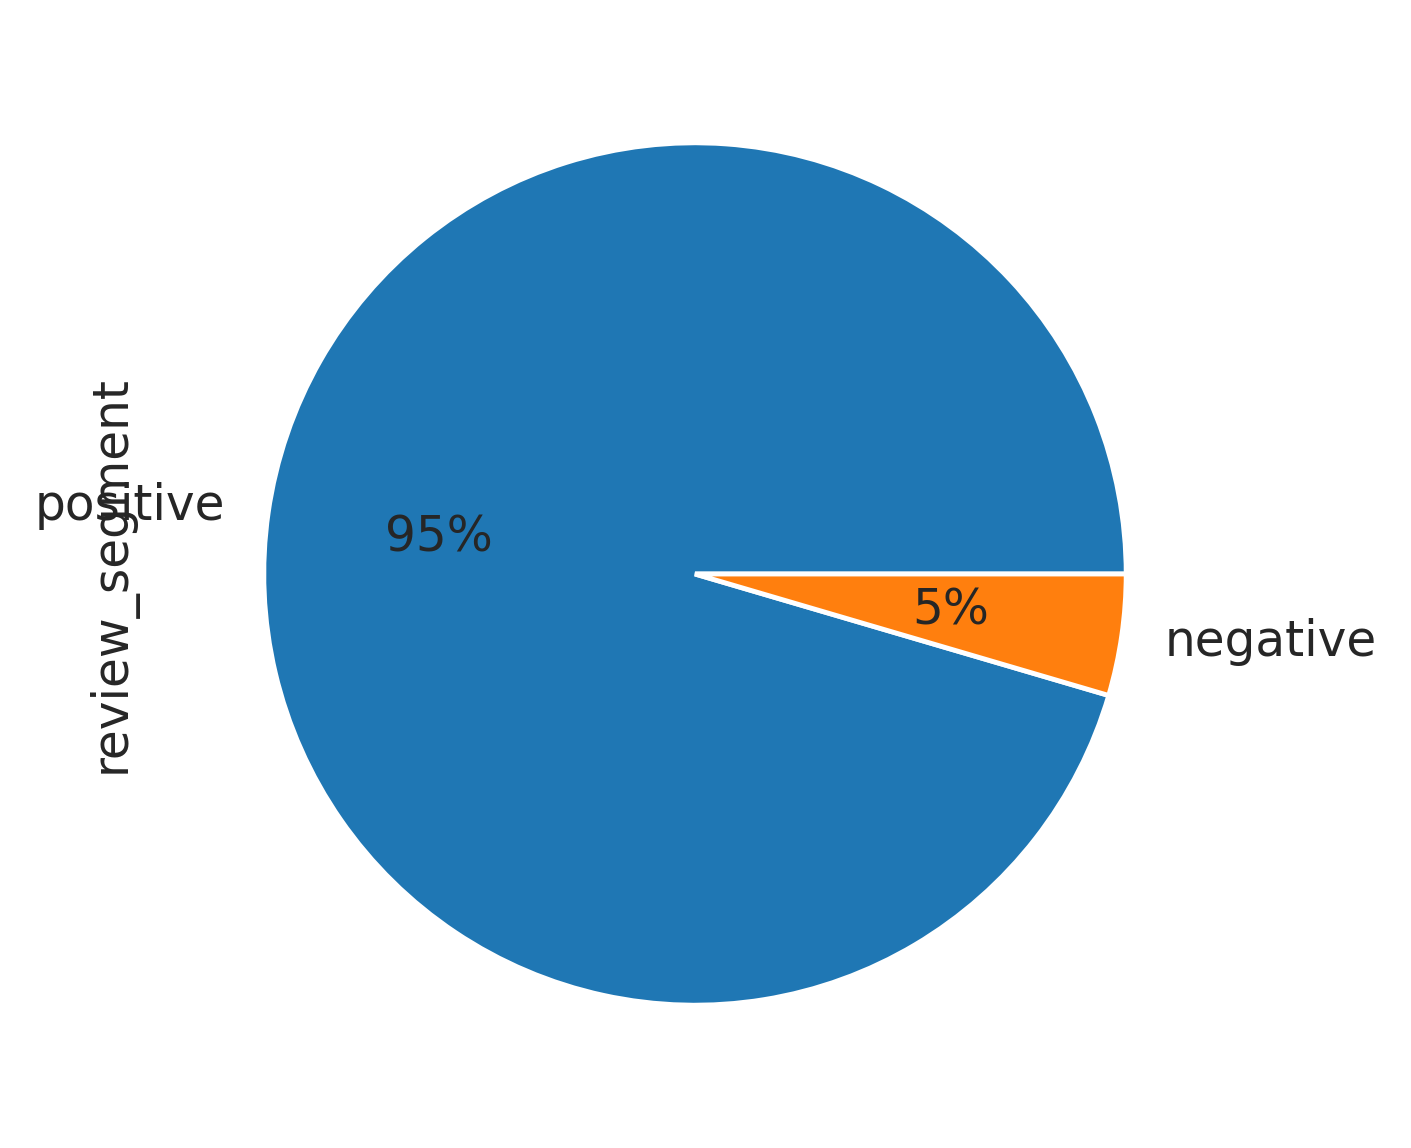

In [175]:
df_corpus['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')